# Polynomial Regression

if the data points in the plot between y & x1 is like parabolic then simple linear model line won't fit well.so polynomial Regression.

y=b0 + b1*x1 + b2*x1 + b2*x1^2 + .... +bn*x1^n

since all are x1,we call x poly

Ex:used to describe how disease spread across population.

in equation we have x^2,.. but why polynomial regression is a Linear Regression? here relationship is non linear but we call Linear because when we say Linear we refer to coefficients b not x.so the y function is expressed as a linear combination of the coeffients b.ultimately coefficients bn are the unknowns.if expression is like (b1*x1^2)/b0*2x1 which we can't bring it down to single coeffcient,then its non linear.

Polymoniall regression is way more adapted to non linear datasets



In [1]:
#Predict the previous salary of the candidate using previous company salary data from glassdoor.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

### Import Dataset

In [2]:
# Position,Level,Salary
dataset=pd.read_csv('https://raw.githubusercontent.com/ProgramSKAN/Sample-Data-For-Machine-Learning/master/Position_Salaries.csv')
X=dataset.iloc[:,1:-1].values #level
y=dataset.iloc[:,-1].values #salary

### Training the Linear Regression model on whole dataset

In [4]:
from sklearn.linear_model import LinearRegression
lin_reg=LinearRegression()
lin_reg.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Training the Polynomial Regression model on whole dataset

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=4) #n=4 in the polynomial regression equation
X_poly=poly_reg.fit_transform(X) #trasnformed matrix of x for 4 degree
poly_reg.fit(X_poly,y)
lin_reg_2=LinearRegression()
lin_reg_2.fit(X_poly,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### Visualising Linear Regression Results

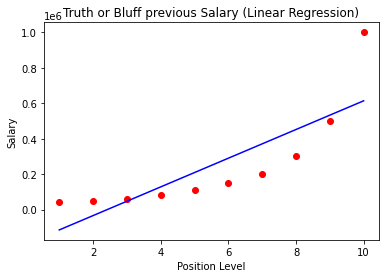

In [7]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg.predict(X),color='blue')
plt.title('Truth or Bluff previous Salary (Linear Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

### Visualising Polynomial Regression Results

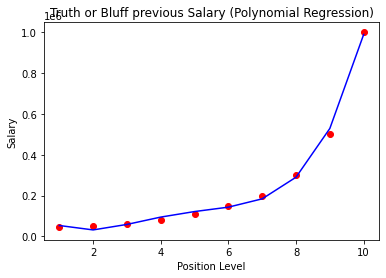

In [18]:
plt.scatter(X,y,color='red')
plt.plot(X,lin_reg_2.predict(poly_reg.fit_transform(X)),color='blue')
plt.title('Truth or Bluff previous Salary (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show() #overfitted due to higher degree but it just an example.

Visualising Polynomial Regression Results(for higher resolution and smooth curve)

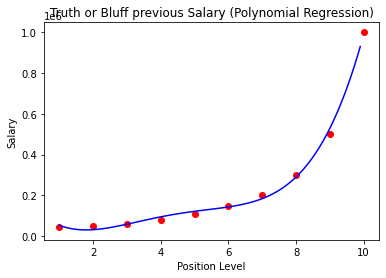

In [11]:
X_grid=np.arange(min(X),max(X),0.1)
X_grid=X_grid.reshape(len(X_grid),1)
plt.scatter(X,y,color='red')
plt.plot(X_grid,lin_reg_2.predict(poly_reg.fit_transform(X_grid)),color='blue')
plt.title('Truth or Bluff previous Salary (Polynomial Regression)')
plt.xlabel('Position Level')
plt.ylabel('Salary')
plt.show()

Predicting new result with Linear regression


In [19]:
lin_reg.predict([[6.5]]) #bad prediction

array([330378.78787879])

### Predicting new result with Polynomial regression

In [20]:
lin_reg_2.predict(poly_reg.fit_transform([[6.5]])) #good prediction

array([158862.45265155])